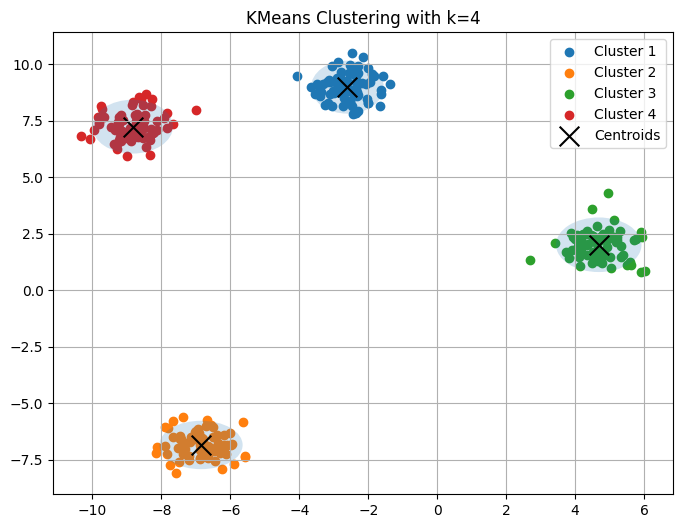

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

# Generate dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Function: Fit and visualize KMeans with cluster highlighting
def plot_kmeans_clusters(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = X[y_kmeans == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

        # Bubble around the cluster
        center = kmeans.cluster_centers_[i]
        std = cluster_points.std(axis=0)
        ellipse = Ellipse(xy=center, width=std[0]*4, height=std[1]*4, alpha=0.2)
        plt.gca().add_patch(ellipse)

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x', label='Centroids')
    plt.title(f'KMeans Clustering with k={k}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_kmeans_clusters(X, k=4)

**Lecture Slides: Clustering & Anomaly Detection**

# **Jupyter Exercise: K-Means and Elbow Method**

### **Instructions:**
1. Load a synthetic dataset using `make_blobs`.
2. Implement your own `kmeans()` function.
3. Implement the `elbow()` function to determine the optimal number of clusters.
4. The code will contain **missing lines** for students to complete.
5. Include visualizations for both clusters and WCSS.



In [73]:
### **Exercise Template:**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)


### **Detailed Instructions for Students:**
- Complete the `fit` method: use Euclidean distance and `np.argmin()` to assign points.
- In `predict()`, compute distances and return cluster indices.
- Visualize clusters using `plt.scatter` and centroids.

---



In [81]:
# Step 1: KMeans implementation
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None


    def fit(self, X):
        # Step 2: Initialize centroids randomly
        np.random.seed(42)  # For reproducibility
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for i in range(self.max_iters):
            # Step 3: Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)


            # Step 4: Recompute centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])
            print(f"the distance on iteration {i} {np.sum(np.linalg.norm(self.centroids - new_centroids, axis=1))}")
            # Stop if centroids do not change
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids


    def predict(self, X):
       # Compute distances again
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
      # Return nearest centroid index
        return np.argmin(distances, axis=1)

    def Plot(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, cmap='viridis', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
        plt.legend()
        plt.show()



In [82]:
kmeans = KMeans(k=4, max_iters=10)
kmeans.fit(X)
print("Centroids:", kmeans.centroids)
#print("Labels:", kmeans.labels)

the distance on iteration 0 3.3735002593191394
the distance on iteration 1 1.5227374557806994
the distance on iteration 2 2.0435900181455757
the distance on iteration 3 1.5455247502199814
the distance on iteration 4 0.15580141763707925
the distance on iteration 5 0.0
Centroids: [[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]]


In [76]:
kmeans.predict(X)

array([1, 3, 2, 3, 1, 1, 0, 2, 3, 3, 0, 3, 2, 3, 1, 2, 2, 1, 0, 0, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 1, 2, 0, 2, 2,
       0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 3, 2, 3, 0, 0, 0,
       3, 1, 3, 0, 2, 0, 3, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 1, 3, 2, 1, 2,
       3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 2, 0, 3, 1, 3, 1, 2, 1, 1, 2, 3, 2,
       0, 0, 1, 3, 1, 2, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0,
       0, 1, 3, 0, 0, 3, 2, 3, 3, 0, 2, 0, 2, 0, 3, 2, 3, 3, 3, 2, 3, 2,
       1, 0, 3, 0, 1, 2, 3, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 3, 1, 2, 0, 3,
       1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 3, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 3, 2, 0, 1, 0, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 3, 0, 0, 1, 1, 2,
       3, 1, 1, 0, 1, 0, 2, 3, 3, 2, 2, 3, 2, 1, 0, 2, 1, 0, 3, 0, 1, 2,
       1, 3, 3, 3, 3, 0, 0, 3, 2, 0, 1, 2, 0, 0, 0, 1, 1, 3, 2, 2, 0, 1,
       3, 0, 2, 3, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 1,
       3, 0, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 0])

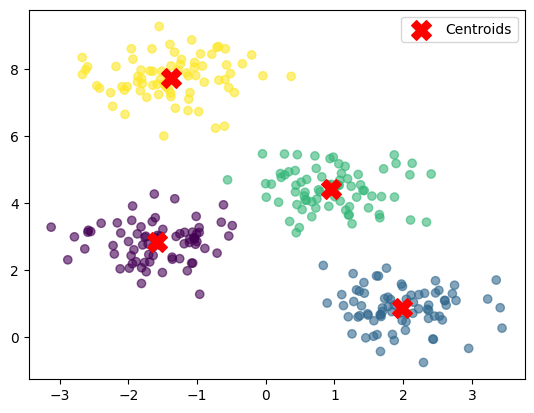

In [77]:
kmeans.Plot(X)

'No previous_centroids'

Dataset: Use a classification dataset from Kaggle (e.g., Credit Card Fraud Detection https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset)
### **Instructions:**
1. Load the dataset and examine class imbalance.
2. Perform anomaly detection using:
   - IQR: Use boxplots and IQR rules to remove outliers.
   - LOF: Use `sklearn.neighbors.LocalOutlierFactor`
   - Isolation Forest: Use `sklearn.ensemble.IsolationForest`
3. Compare performance of classifiers (e.g., logistic regression, random forest):
   - Without anomaly detection
   - With anomaly detection (cleaned dataset)

### **Tasks:**
- Evaluate models using precision, recall, and F1-score.
- Discuss whether removing anomalies **improves prediction**.
- Visualize decision boundaries with and without anomaly filtering.

---

**End of Lecture**


# Imports

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import tensorflow as tf
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


# Load the dataset

In [8]:
creditcards = pd.read_csv("/content/creditcard.csv")
creditcards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
creditcards.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
creditcards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
creditcards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
missing_values_count = creditcards.isnull().sum()
missing_values_count

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Handling duplicates

In [19]:
duplicate_values = creditcards.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_values}')

creditcards = creditcards.drop_duplicates()
print(f'Number of rows after dropping duplicates: {creditcards.shape[0]}')

Number of duplicate rows: 1081
Number of rows after dropping duplicates: 283726


# Checking Dataset is Balanced or Imbalanced

In [21]:
classes=creditcards['Class'].value_counts()
print(f'normal_trans ={classes[0]}')
print(f'fraud_trans ={classes[1]}')
print(f'percentage_normal_trans ={(classes[0] / creditcards["Class"].count())*100:.2f}%')
print(f'percentage_fraud_trans ={(classes[1] / creditcards["Class"].count())*100:.2f}%')

normal_trans =283253
fraud_trans =473
percentage_normal_trans =99.83%
percentage_fraud_trans =0.17%


# Plot

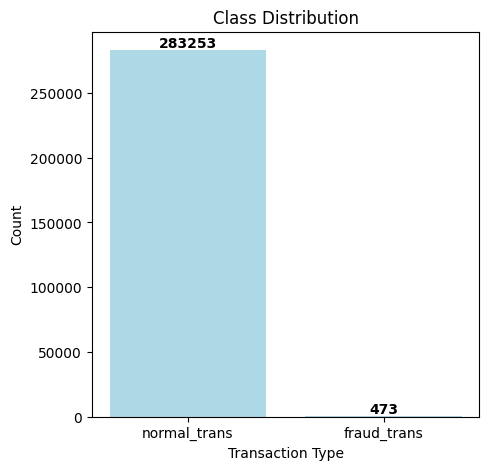

In [22]:
title=['normal_trans','fraud_trans']
value=[classes[0],classes[1]]
plt.figure(figsize=(5, 5))
bars = plt.bar(title, value, color='lightblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20,
             str(int(yval)),
             ha='center', va='bottom', fontweight='bold')
plt.title('Class Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [ ]:
x = creditcards.drop('Class', axis=1)#features
y=creditcards['Class']#target
var=x.columns
fig, axes = plt.subplots(10, 3, figsize=(10, 5))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(x[var[i]], ax=ax)
    ax.set_title(var[i])

plt.tight_layout()
plt.show()